# Credit Card Fraud Detection
## 1.0 Introduction

The aim of this project is to build a machine learning algorithm that can effectively detect a fraudulent transaction. 

The datasets can be found on Kaggle and it contains transactions made by credit cards in September 2013 by european cardholders. 
This dataset presents transactions that occurred over two days and contains 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

Due to confidentiality issues, the original features are not given. The features are described below:

- Features V1, V2, ... V28 are the principal components obtained with PCA
- The only features which have not been transformed with PCA are Time and Amount. Feature Time contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature Amount is the transaction Amount, this feature can be used for example-dependant cost-senstive learning and no unit is provided for this
- The Feature Class is the response variable and it takes value 1 in case of fraud and 0 otherwise
 

This project is divided into five sections: 
1. Introduction
2. Exploratory Data Analysis
3. Data pre-processing
4. Predictive models
 - Random Forest Classifier
 - Logistic Regression
5. Conclusion and reccomendations of future work

### 1.1 Import Python Libraries

In [3]:
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import time
import numpy as np

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

### 1.2 Read Data on Jupyter Notebook

In [59]:
raw_data= pd.read_csv("creditcard.csv")

### 1.3 Inspect the data

In [132]:
#Look at first 5 rows of the dataset
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#Display size/shape of data
raw_data.shape

(284807, 31)

In [7]:
#Show the class of payments. 
#O refers to no-fraud and 1 refers to fraud
raw_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
#Show summary statistics
raw_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
#Show if there are any missing values
raw_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [18]:
# Show a list of all the columns 
raw_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [23]:
# The classes are heavily skewed we need to solve this issue later.
print('No Frauds make up', round(raw_data['Class'].value_counts()[0]/len(raw_data) * 100, 2), '% of the dataset')
print('Frauds make up', round(raw_data['Class'].value_counts()[1]/len(raw_data) * 100, 2), '% of the dataset')

No Frauds make up 99.83 % of the dataset
Frauds make up 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

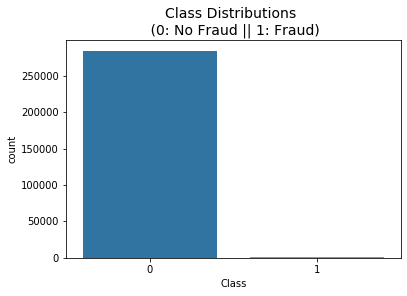

In [26]:
#Visualising the Class column 
#We can see how imbalanced the dataset 
sns.countplot('Class', data=raw_data)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

### 1.4 Summary
#### From this first glimpse of the data it is important to note that:
- there is no missing data
- the data set is highly imbalanced 


## 2.0 Exploratory Data Analysis

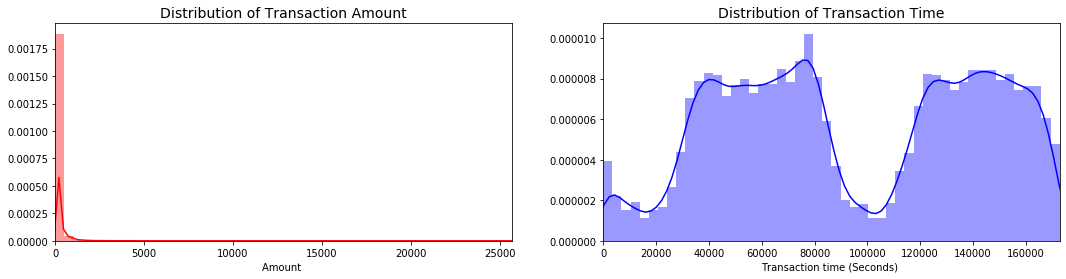

In [135]:
#The plots below show the distribution of the Transaction Amount and the Transaction Times

#Create 2 plots in one view
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = raw_data['Amount'].values
time_val = raw_data['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set_xlabel('Amount ')

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
ax[1].set_xlabel('Transaction time (Seconds) ')

plt.show()

The distibution plots above show that the amount feature is very skewed and the transaction time is cyclical over the 2days with two peaks and troughs.

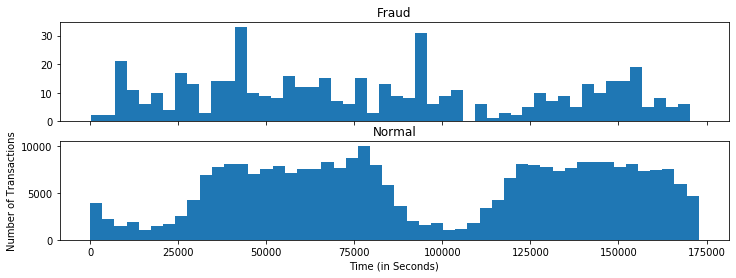

In [137]:
#Show the number of normal and fraudulent transactions

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 50

ax1.hist(raw_data.Time[raw_data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(raw_data.Time[raw_data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

The following can be identified from the above plot:
- there appaars to be a normal distribution of the normal transactions made across the two days
- tt looks like there are two lulls in credit card transactions during nighttime on each day.



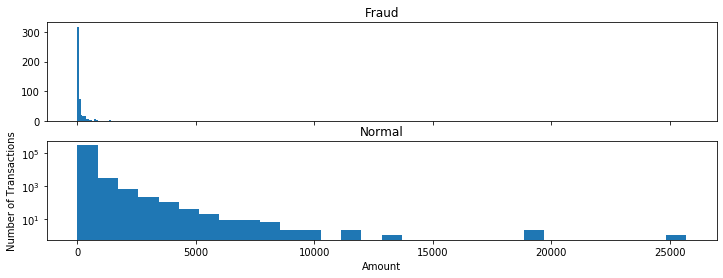

In [138]:
# Visualising the number of transactions that are classified fraud and normal based on the amounts spent in each category

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,4))

bins = 30

ax1.hist(raw_data.Amount[raw_data.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(raw_data.Amount[raw_data.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

#### The results of this graph show the following: 
-  majority of the normal payments cost less then 10000
- the fraudelent payments are mostly less than 1000
- there are a number of outlier normal payments that exceed 10000


In [142]:
#statistics of the amount for fraud transactions
raw_data[raw_data.Class == 1].Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [143]:
#statistics of the amount for normal transactions
raw_data[raw_data.Class == 0].Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

From the summary statistics above, it shows that the average fraud transaction is for 122, wheras the average normal payment is 88. The maximum fraud transaction is 2125 and 25691 for normal transactions


### 2.1 Scaling the data

In [7]:
from sklearn.preprocessing import StandardScaler, RobustScaler

In [60]:
#Creating a new dataframe 
scaled_df = raw_data.copy()

In [61]:
std_scaler = StandardScaler()

scaled_df['scaled_amount'] = rob_scaler.fit_transform(scaled_df['Amount'].values.reshape(-1,1))

scaled_df.drop(['Time','Amount'], axis=1, inplace=True)

In [62]:
scaled_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579


In [63]:
scaled_amount = scaled_df['scaled_amount']

scaled_df.drop(['scaled_amount'], axis=1, inplace=True)
#moving columns to the first couple of columns 
scaled_df.insert(0, 'scaled_amount', scaled_amount)

scaled_df.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


##  3.0 Predictive Models
There are many approaches that can be used to deal with imbalanced data but the following three will be focused on:
- Undersampling Majority Class
- Oversampling Minority Class
- Apply Keras on undersampled and oversampled data set

### 3.1 Random Undersampling Majority Class
The data set was split first before applying the resampling techniques.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

In [64]:
X = scaled_df.drop('Class', axis=1)
y = scaled_df['Class']

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


In [65]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
264873,-0.269126,-0.395578,1.489129,-0.833442,-0.224271,0.369444,-1.453886,0.796593,-0.060403,0.338270,...,0.054132,0.231624,0.955194,-0.172092,-0.041050,-0.313444,-0.174301,0.064657,-0.036960,0
163821,0.229721,1.950487,0.002312,-1.761814,1.232470,0.523175,-0.650657,0.504231,-0.200857,0.116805,...,-0.285207,0.086306,0.326297,-0.068839,-0.416589,0.426044,-0.486299,-0.031266,-0.072543,0
72083,-0.293440,1.105167,-0.166253,0.569520,0.681043,-0.259189,0.642792,-0.437034,0.356746,0.441417,...,-0.226981,0.009073,0.293023,-0.028688,-0.242206,0.389813,0.482852,0.010705,-0.008399,0
196949,0.222036,1.805238,0.961264,-1.717212,4.094625,0.938666,-0.227785,0.152911,0.066753,-1.073784,...,-0.150818,-0.137875,-0.450959,0.098530,-0.662272,-0.150154,-0.098852,-0.000030,0.017622,0
126213,3.004262,0.835421,-1.191847,0.578455,0.586101,-1.236663,0.194617,-0.532404,0.061561,-0.734344,...,-0.045313,-0.072349,-0.109154,-0.308356,0.011968,0.461350,-0.244810,0.031845,0.060910,0


In [66]:
# Shuffle the data before creating the subsamples
X.sample(frac=1)

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
272435,-0.223713,-0.430639,1.129230,-0.317749,-0.515149,0.422745,-1.330462,1.038514,0.087676,-0.496515,...,-0.338868,0.108847,0.288079,-0.170998,0.083515,-0.256137,0.479433,-0.039384,0.100749,0
45734,0.950045,-10.809426,6.038202,-8.664237,1.382239,-6.795318,-1.913761,-4.205174,6.921839,-0.197928,...,0.016628,0.231279,-0.276357,-0.285855,0.431881,0.209293,-0.370378,0.100862,-0.090853,0
153709,-0.167959,2.044870,-0.109624,-0.991716,0.072697,0.233003,-0.127211,-0.312166,-0.038275,1.679606,...,-0.210579,-0.601932,-1.615813,0.524747,0.064169,-0.707876,-0.037146,-0.108915,-0.063268,0
221218,0.183050,-0.896055,0.016009,-0.969787,-2.057508,3.886184,2.794894,0.534897,0.820796,-0.558698,...,0.082017,-0.000518,-0.404810,0.005859,0.662458,0.168167,-0.572644,0.067245,0.138034,0
23315,-0.093901,-0.447297,0.983305,1.435173,-0.222945,0.132739,-0.350622,0.663950,0.080249,-0.683062,...,0.163158,-0.188034,-0.519444,-0.051344,-0.014856,-0.164865,0.073015,0.258941,0.108833,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40089,-0.097813,1.454599,-0.975117,0.323461,-1.573181,-1.048725,-0.022020,-1.017085,-0.010278,-2.260112,...,-0.262811,-0.142509,0.037018,-0.003820,-0.299898,0.366257,-0.177592,0.049470,0.006748,0
109096,0.367638,1.189383,0.005645,0.128757,1.092943,-0.175952,-0.248330,0.016501,-0.017985,0.548045,...,-0.123984,-0.254208,-0.767280,-0.105992,-0.499527,0.583637,-0.461563,0.011583,0.021706,0
239273,-0.190875,-0.845707,2.516046,-0.228972,4.239966,0.719634,0.817466,0.184541,-1.212443,-2.463077,...,-0.156665,1.679748,0.039009,0.086456,-0.336901,-0.424135,0.391490,0.266249,0.205914,0
168905,0.020960,2.095638,0.257295,-2.234204,0.503491,0.872519,-0.885943,0.512776,-0.401398,0.271091,...,-0.069798,-0.267024,-0.598791,0.033770,-1.066632,0.121402,0.241672,-0.055779,-0.043081,0


In [67]:
# Separate minority and majority classes
non_fraud = X[X.Class==0]
fraud = X[X.Class==1]

In [68]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# downsample majority
non_fraud_downsampled = resample(non_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled_df = pd.concat([non_fraud_downsampled, fraud])

# checking counts
downsampled_df.Class.value_counts()

1    360
0    360
Name: Class, dtype: int64

In [69]:
# Shuffle dataframe rows
downsampled_df.sample(frac=1, random_state=42)

,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
98111,-0.254454,-4.848900,3.610600,-0.283993,-2.207791,-1.255317,-0.688308,-0.081999,0.759891,2.906110,...,1.587524,-0.461561,-0.288295,0.206754,0.152545,0.133912,0.643591,0.285362,-0.044378,0
106394,0.251240,1.250707,-1.148838,0.401122,-2.695707,-1.441942,-0.593248,-0.797822,0.010627,0.804675,...,-0.440369,-0.237953,0.029074,-0.040261,0.235312,0.494388,-0.738730,0.118529,0.025308,0
15804,0.336338,-1.640589,1.106706,0.627323,0.934634,0.592832,0.551542,0.760332,-0.371678,0.028929,...,0.143591,-0.086744,0.101735,-0.406760,-0.988369,0.650879,-0.063727,-0.825858,0.276481,0
157345,-0.293440,2.070625,-0.022255,-1.475932,0.179219,0.478651,-0.326498,-0.082308,-0.165195,1.901780,...,-0.285815,0.130726,0.707104,-0.031451,0.225619,0.333886,-0.482062,-0.031635,-0.069112,0
623,7.084469,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52783,2.684832,0.733312,-1.049512,1.107377,0.494952,-1.484658,-0.156086,-0.449269,0.107320,1.151221,...,0.287322,-0.047305,-0.313003,-0.005225,0.689325,-0.085613,0.917735,-0.055734,0.051942,0
159169,-0.282540,0.154571,1.080530,-0.401928,-0.554177,0.962757,-0.812873,1.006156,-0.136514,-0.117472,...,0.045498,-0.339114,-0.800178,0.082524,0.572138,-0.402522,0.112166,0.226087,0.084929,0
168465,0.041780,-0.944500,0.069853,-0.067113,-2.303195,0.656293,0.185310,-0.487065,0.678819,-1.253240,...,0.178256,0.376464,0.731694,-0.349233,-0.449769,0.132284,-0.170895,0.010985,0.028026,0
280149,0.780968,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,1


The correlation matrix below shows that the features are not correlated with each other. 

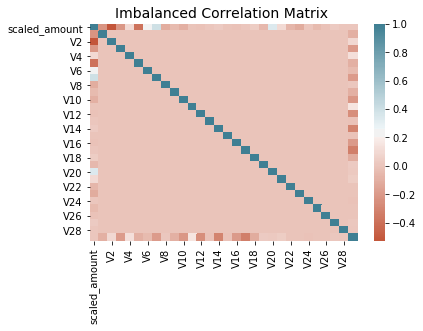

In [111]:
# Make sure we use the subsample in our correlation

plt.figsize=(24,24)

# Entire DataFrame
corr = scaled_df.corr()
sns.heatmap(corr, cmap=sns.diverging_palette(20, 220, n=200), annot_kws={'size':20})
plt.title("Imbalanced Correlation Matrix ", fontsize=14)
plt.show()

In [70]:
X_undersample = downsampled_df.drop('Class', axis=1)
y_undersample =  downsampled_df['Class']

print("Number transactions train dataset: ", len(X_undersample))

Number transactions train dataset:  720


### 3.1 (a) Apply algorithms
The models are trained on two algorithms:
- Logistic Regression
- Random Forest Classifier

In [4]:
# Use GridSearchCV to find the most appropriate hyper parameters
from sklearn.model_selection import GridSearchCV

In [5]:
# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_undersample, y_undersample)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

#RandomForest Classifier
parameters = {'n_estimators': [320,330,340], 'max_depth': [8, 9, 10, 11, 12]}
grid_RF = GridSearchCV(RandomForestClassifier(), parameters)
grid_RF.fit(X_undersample, y_undersample)
# RF best parameters
RF = grid_tree.best_estimator_

NameError: name 'LogisticRegression' is not defined

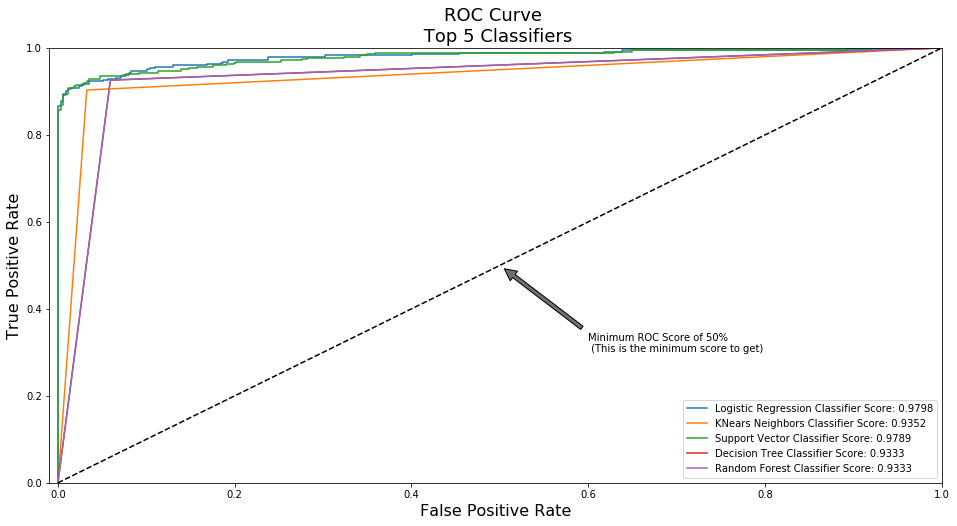

In [112]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train_undersample, log_reg_pred)
Rf_fpr, Rf_tpr, Rf_threshold = roc_curve(y_train_undersample, rf_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, Rf_fpr, Rf_tpr):
    plt.figure(figsize=(12,6))
    plt.title('ROC Curve \n 2 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train_undersample, log_reg_pred)))
    plt.plot(Rf_fpr, Rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train_undersample, rf_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, Rf_fpr, Rf_tpr)
plt.show()

In [106]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train_undersample, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train_undersample, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train_undersample, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train_undersample, tree_pred))
print('Random Forest Classifier: ', roc_auc_score(y_train_undersample, rf_pred))

Logistic Regression:  0.9798456296972616
KNears Neighbors:  0.9352464767895035
Support Vector Classifier:  0.9788987800857237
Decision Tree Classifier:  0.933289372458512
Random Forest Classifier:  0.933289372458512


In [74]:
# Predicting results on the original test set

undersampled_log = log_reg.predict(X_test)
undersampled_rf= RF.predict(X_test)

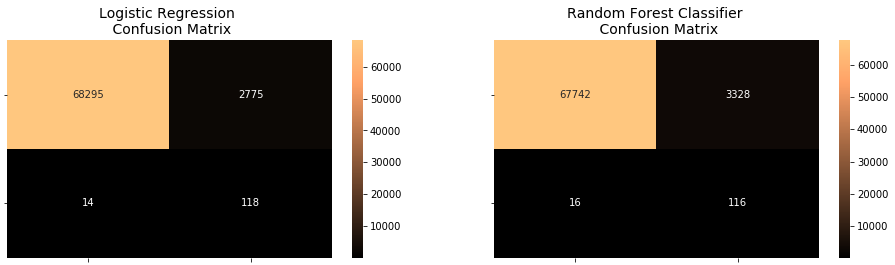

In [76]:
# Plot the confusion matrix for both algorithms
from sklearn.metrics import confusion_matrix

# Confusion matrix calculated from Sklearn's library
log_reg_cf = confusion_matrix(y_test, undersampled_log)
rf_cf = confusion_matrix(y_test, undersampled_rf)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(16,4))

sns.heatmap(log_reg_cf, ax=ax[0], annot=True, cmap=plt.cm.copper, fmt='g')
ax[0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(rf_cf, ax=ax[1], annot=True, cmap=plt.cm.copper, fmt='g')
ax[1].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

The results show that the Random Forest Classifier has a better recall, predicting 16 compared to the Logistic Regression predicting 14. 

In [ ]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

In [61]:
from sklearn.metrics import auc
auc_score = auc(recall, precision)

In [62]:
auc_score

0.4525579919684075

In [64]:
precision, recall, _ = precision_recall_curve(y_test, undersampled_log)
auc_score = auc(recall, precision)

In [65]:
auc_score

0.46828339896229887

In [66]:
# Plotting Precision, Recall curves
from sklearn.metrics import precision_recall_curve

In [ ]:
def graph_recall_precision_multiple(log_fpr, log_tpr, Rf_fpr, Rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 5 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train_undersample, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train_undersample, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train_undersample, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train_undersample, tree_pred)))
    plt.plot(Rf_fpr, Rf_tpr, label='Random Forest Classifier Score: {:.4f}'.format(roc_auc_score(y_train_undersample, rf_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr, Rf_fpr, Rf_tpr)
plt.show()

Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.45')

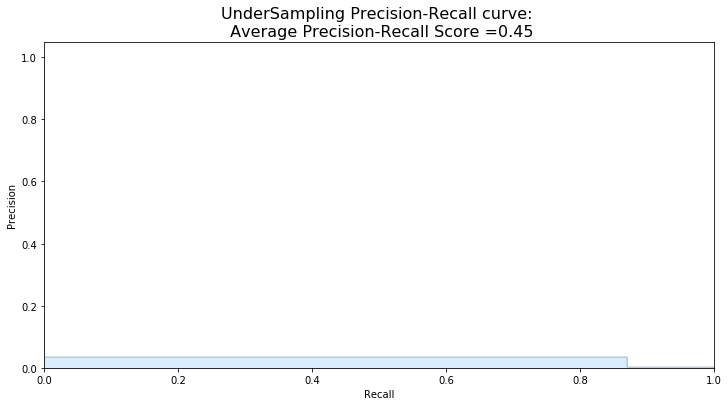

In [63]:
# Plot Rf, Log and Support Vector Machines
precision, recall, _ = precision_recall_curve(y_test, undersampled_log)
precision, recall, _ = precision_recall_curve(y_test, undersampled_svm)
precision, recall, _ = precision_recall_curve(y_test, undersampled_rf)

fig = plt.figure(figsize=(12,6))




plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          auc_score), fontsize=16)

In [77]:
from sklearn.metrics import classification_report

# Show classification report of both algorithms
print('Logistic Regression:')
print(classification_report(y_test, undersampled_log))

print('Random Forest Classifier:')
print(classification_report(y_test, undersampled_rf))


Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98     71070
           1       0.04      0.89      0.08       132

    accuracy                           0.96     71202
   macro avg       0.52      0.93      0.53     71202
weighted avg       1.00      0.96      0.98     71202

Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98     71070
           1       0.03      0.88      0.06       132

    accuracy                           0.95     71202
   macro avg       0.52      0.92      0.52     71202
weighted avg       1.00      0.95      0.97     71202



The key things to look out for in the classification report are:

Accuracy = TP+TN/Total data

Precison = TP/(TP+FP)

Recall = TP/(TP+FN)

In this instance, recall will be a better option because the number of normal transacations are very high as compared to the number of fraud cases and sometimes a fraud case will be predicted as normal. So, recall will give us a sense of only fraud cases.

#### Summary of Undersampling results
Overall, we can see the undersampled data set doesn't do a great job in accurately predicting the fraudulent transactions. Both algorithms are able to achieve 100% precision for the non-fraud Class compared to only 3-4% precision for the fraud class. The recall appears to be better with 89% and 88% for fraud class predictions.

The undersampled data set is very small with only 720 rows, therefore there is not enough training data for the algorithm to learn the patterns to detect the fraudulent transaction. 

### 3.2 Oversampling Minority Class
Oversampling requires artifically creating new observations in the data set which is under represented in the data.

In [78]:
# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(non_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([non_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()

1    213245
0    213245
Name: Class, dtype: int64

In [79]:
# Splitting the data set
y_oversampled = upsampled.Class
X_oversampled = upsampled.drop('Class', axis=1)

### 3.2 (a) Apply Algorithms

In [ ]:
## Grid search wasn't used becuase it was taking too long to process on my computer. 

In [80]:
#Applying algorithms using the default hyperparameters
log_model = LogisticRegression()
RF_model = RandomForestClassifier()

In [81]:
#fit the algorithms to the oversampled training set
log_reg = log_model.fit(X_oversampled, y_oversampled)
RF = RF_model.fit(X_oversampled, y_oversampled)

In [83]:
#predicting results on the original test
oversampled_log = log_reg.predict(X_test)
oversampled_rf= RF.predict(X_test)

In [38]:
log_reg_cf

array([[69546,  1524],
       [   15,   117]])

In [39]:
rf_cf

array([[71066,     4],
       [   24,   108]])

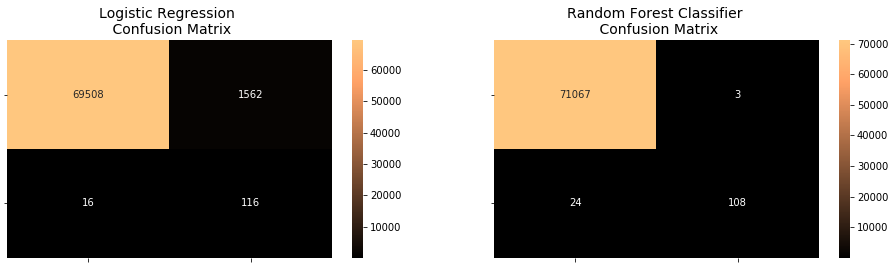

In [84]:
# Plot Confusion matrix for predicted results

from sklearn.metrics import confusion_matrix

# Create confusion matrix from Sklearn library
log_reg_cf = confusion_matrix(y_test, oversampled_log)
rf_cf = confusion_matrix(y_test, oversampled_rf)

# Create 2 subplots
fig, ax = plt.subplots(1, 2, figsize=(16,4))

sns.heatmap(log_reg_cf, ax=ax[0], annot=True, cmap=plt.cm.copper,fmt='g' )
ax[0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(rf_cf, ax=ax[1], annot=True, cmap=plt.cm.copper, fmt='g')
ax[1].set_title("Random Forest Classifier \n Confusion Matrix", fontsize=14)
ax[1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1].set_yticklabels(['', ''], fontsize=14, rotation=360)

plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Show classification report of both algorithms
print('Logistic Regression:')
print(classification_report(y_test, undersampled_log))

print('Random Forest Classifier:')
print(classification_report(y_test, undersampled_rf))

## 4.0 Keras- Undersampling 

Keras was used to determine if using neural networks would provide better results in detecting fraud transactions. The undersampled data set only has 720 rows so it is a small dataset. It is not expected the results won't be any better because neural networks require a much larger data set for best results. 

In [85]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_undersample.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

Using TensorFlow backend.


In [86]:
undersample_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 29)                870       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                960       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,896
Trainable params: 1,896
Non-trainable params: 0
_________________________________________________________________


In [87]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [88]:
undersample_model.fit(X_undersample, y_undersample, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Train on 576 samples, validate on 144 samples
Epoch 1/20
 - 1s - loss: 0.5539 - accuracy: 0.6649 - val_loss: 0.3709 - val_accuracy: 0.8056
Epoch 2/20
 - 0s - loss: 0.3552 - accuracy: 0.9115 - val_loss: 0.3646 - val_accuracy: 0.8125
Epoch 3/20
 - 0s - loss: 0.2726 - accuracy: 0.9358 - val_loss: 0.3378 - val_accuracy: 0.8472
Epoch 4/20
 - 0s - loss: 0.2276 - accuracy: 0.9410 - val_loss: 0.3281 - val_accuracy: 0.8472
Epoch 5/20
 - 0s - loss: 0.1858 - accuracy: 0.9497 - val_loss: 0.2764 - val_accuracy: 0.8681
Epoch 6/20
 - 0s - loss: 0.1608 - accuracy: 0.9549 - val_loss: 0.3002 - val_accuracy: 0.8681
Epoch 7/20
 - 0s - loss: 0.1419 - accuracy: 0.9549 - val_loss: 0.3076 - val_accuracy: 0.8750
Epoch 8/20
 - 0s - loss: 0.1269 - accuracy: 0.9566 - val_loss: 0.3060 - val_accuracy: 0.8750
Epoch 9/20
 - 0s - loss: 0.1154 - accuracy: 0.9583 - val_loss: 0.3192 - val_accuracy: 0.8750
Epoch 10/20
 - 0s - loss: 0.1083 - accuracy: 0.9566 - val_loss: 0.3283 - val_accuracy: 0.8819
Epoch 11/20
 - 0s - los

In [89]:
undersample_fraud_predictions = undersample_model.predict_classes(X_test, batch_size=200, verbose=0)

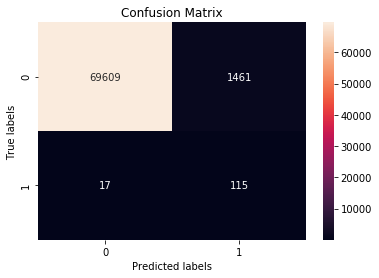

In [90]:
undersample_cm = confusion_matrix(y_test, undersample_fraud_predictions)


ax= plt.subplot()
sns.heatmap(undersample_cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [ ]:
# reduce to 1d array in order to use sklearn classification report 
undersample_fraud_predictions = undersample_fraud_predictions[:, 0]

In [ ]:
print(classification_report(y_test, undersample_fraud_predictions))

## 4.1 Keras Oversampling

In [91]:
n_inputs = X_oversampled.shape[1]

oversample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [92]:
oversample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [93]:
oversample_model.fit(X_oversampled, y_oversampled, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Train on 341192 samples, validate on 85298 samples
Epoch 1/20
 - 5s - loss: 0.0790 - accuracy: 0.9705 - val_loss: 0.0220 - val_accuracy: 1.0000
Epoch 2/20
 - 4s - loss: 0.0145 - accuracy: 0.9971 - val_loss: 0.0091 - val_accuracy: 1.0000
Epoch 3/20
 - 4s - loss: 0.0079 - accuracy: 0.9984 - val_loss: 0.0059 - val_accuracy: 1.0000
Epoch 4/20
 - 4s - loss: 0.0055 - accuracy: 0.9989 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 5/20
 - 4s - loss: 0.0043 - accuracy: 0.9992 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 6/20
 - 4s - loss: 0.0036 - accuracy: 0.9993 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 7/20
 - 4s - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 8/20
 - 4s - loss: 0.0027 - accuracy: 0.9995 - val_loss: 5.1558e-04 - val_accuracy: 1.0000
Epoch 9/20
 - 4s - loss: 0.0022 - accuracy: 0.9995 - val_loss: 6.9667e-04 - val_accuracy: 1.0000
Epoch 10/20
 - 4s - loss: 0.0020 - accuracy: 0.9996 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 11/2

In [94]:
oversample_predictions = oversample_model.predict(X_test, batch_size=200, verbose=0)

In [95]:
oversample_fraud_predictions = oversample_model.predict_classes(X_test, batch_size=200, verbose=0)

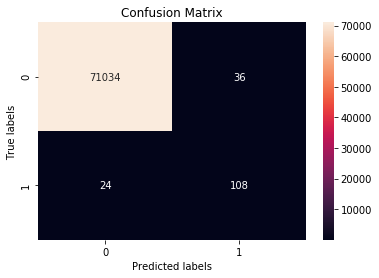

In [96]:
oversample_cm = confusion_matrix(y_test, oversample_fraud_predictions)

ax= plt.subplot()
sns.heatmap(oversample_cm, annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');

In [ ]:
# reduce to 1d array in order to use sklearn classification report 
oversample_fraud_predictions = oversample_fraud_predictions[:, 0]

In [ ]:
print(classification_report(y_test, oversample_fraud_predictions))

## 5.0 Conclusion and recommendations of future works

We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. We then investigated two predictive models. The data was split in 3 parts, a train set, a validation set and a test set. For the first three models, we only used the train and test set.

We started with RandomForrestClassifier, for which we obtained an AUC scode of 0.85 when predicting the target for the test set.

We followed with an AdaBoostClassifier model, with lower AUC score (0.83) for prediction of the test set target values.

We then followed with an CatBoostClassifier, with the AUC score after training 500 iterations 0.86.

To improve a chosen model, we searched over a grid of hyperparameters and compared performance with cross-validation. It may be possible to improve the random forest model by further tweaking the hyperparameters, given additional time and/or computational power.